## CME statistics

***


In [11]:
# for installation of a conda environment to run this notebook, see instructions in README.md
# conda dependencies are listed under environment.yml, and pip in requirements.txt

from scipy import stats
import scipy.io
from matplotlib import cm
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import astropy.constants as const
import sunpy.time
import time
import pickle
import seaborn as sns
import os
import urllib
import json


#warnings.filterwarnings('ignore') # some numpy mean-of-empty-slice runtime warnings


print('hello')

hello


## Catalog reading



In [12]:

plt.close('all')
print()
print('cme_stats.py main program.')
print('ICME parameters at all 4 terrestrial planets.')
print('Christian Moestl, IWF Graz, Austria')


#save as pickle with datetime
file='icmecat/HELCATS_ICMECAT_v20.p'
print('loaded ', file)
ic=pickle.load(open(file, "rb" ) )  
ic.keys() 


cme_stats.py main program.
ICME parameters at all 4 terrestrial planets.
Christian Moestl, IWF Graz, Austria
loaded  icmecat/HELCATS_ICMECAT_v20.p


Index(['icmecat_id', 'sc_insitu', 'icme_start_time', 'mo_start_time',
       'mo_end_time', 'icme_end_time', 'icme_bmax', 'icme_bmean',
       'icme_duration', 'mo_bmax', 'mo_bmean', 'mo_bstd', 'mo_bzmean',
       'mo_bzmin', 'mo_duration', 'mo_sc_heliodistance', 'sc_long_heeq',
       'sc_lat_heeq'],
      dtype='object')

In [21]:
wini=np.where(ic.sc_insitu == 'Wind')[:][0] 
vexi=np.where(ic.sc_insitu == 'VEX')[:][0]  
mesi=np.where(ic.sc_insitu == 'MESSENGER')[:][0]   
stai=np.where(ic.sc_insitu == 'STEREO-A')[:][0]    
stbi=np.where(ic.sc_insitu == 'STEREO-B')[:][0]    
mavi=np.where(ic.sc_insitu == 'MAVEN')[:][0]    
ulyi=np.where(ic.sc_insitu == 'ULYSSES')[:][0]   

print(ic.icme_start_time)

imercind=np.where(np.logical_and(ic.sc_insitu =='MESSENGER', ic.icme_start_time > sunpy.time.parse_time('2011-03-18').datetime))
print(imercind)


0      2007-01-14 11:31:00
1      2007-01-15 20:49:00
2      2007-02-02 04:04:00
3      2007-03-24 05:15:00
4      2007-03-29 15:04:00
              ...         
699    2017-01-12 08:40:00
700    2017-01-19 05:50:00
701    2017-07-03 22:20:00
702    2017-07-22 14:30:00
703    2017-07-26 04:30:00
Name: icme_start_time, Length: 704, dtype: object
(array([616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628,
       629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641,
       642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654,
       655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667,
       668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680]),)


In [11]:
wini




array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

1.0453333333333334
0.031046502039503408


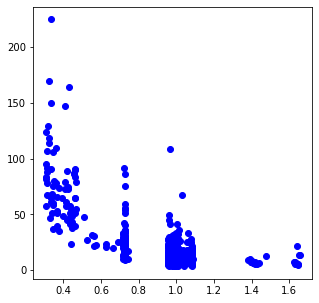

In [12]:
fig=plt.figure(1,figsize=(5,5))
fsize=15
plt.plot(ic.mo_sc_heliodistance, ic.mo_bmax,'bo')   
print(np.mean(ic.mo_sc_heliodistance[stbi]))
print(np.std(ic.mo_sc_heliodistance[stbi]))



In [6]:
ic


,icmecat_id,sc_insitu,icme_start_time,mo_start_time,mo_end_time,icme_end_time,icme_bmax,icme_bmean,icme_duration,mo_bmax,mo_bmean,mo_bstd,mo_bzmean,mo_bzmin,mo_duration,mo_sc_heliodistance,sc_long_heeq,sc_lat_heeq
0,ICME_Wind_NASA_20070114_01,Wind,2007-01-14 11:31:00,2007-01-14 11:44:00,2007-01-15 07:45:00,2007-01-15 07:45:00,14.6,11.4,20.23,14.6,11.4,2.5,1.5,-10.5,20.02,0.9730,0.14,-4.47
1,ICME_Wind_NASA_20070115_01,Wind,2007-01-15 20:49:00,2007-01-15 20:49:00,2007-01-16 04:45:00,2007-01-16 06:14:00,10.4,7.7,9.42,10.4,8.0,1.1,0.5,-6.8,7.93,0.9731,0.15,-4.59
2,ICME_Wind_NASA_20070202_01,Wind,2007-02-02 04:04:00,2007-02-02 04:04:00,2007-02-02 14:35:00,2007-02-02 14:35:00,4.1,3.5,10.52,4.1,3.5,0.3,-0.7,-1.9,10.52,0.9757,0.23,-6.09
3,ICME_Wind_NASA_20070324_01,Wind,2007-03-24 05:15:00,2007-03-24 05:15:00,2007-03-24 12:30:00,2007-03-25 05:02:00,13.1,9.5,23.78,10.9,9.9,0.6,-5.4,-9.8,7.25,0.9885,0.02,-6.96
4,ICME_Wind_NASA_20070329_01,Wind,2007-03-29 15:04:00,2007-03-29 15:04:00,2007-03-30 03:33:00,2007-03-30 03:33:00,6.1,4.5,12.48,6.1,4.5,1.0,1.1,-5.5,12.48,0.9900,-0.03,-6.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,ICME_MAVEN_MOESTL_20170112_01,MAVEN,2017-01-12 08:40:00,2017-01-13 03:00:00,2017-01-13 16:50:00,NaN,6.8,4.7,32.17,5.7,5.1,0.4,0.1,-3.3,13.83,1.4200,-89.22,4.93
700,ICME_MAVEN_MOESTL_20170119_01,MAVEN,2017-01-19 05:50:00,2017-01-19 15:00:00,2017-01-20 18:30:00,NaN,5.5,4.3,36.67,5.5,4.8,0.5,3.0,0.8,27.50,1.4267,-92.06,4.72
701,ICME_MAVEN_MOESTL_20170703_01,MAVEN,2017-07-03 22:20:00,2017-07-04 21:00:00,2017-07-06 04:40:00,NaN,7.8,4.4,54.33,7.8,6.0,1.5,2.4,0.9,31.67,1.6230,-168.99,-2.83
702,ICME_MAVEN_MOESTL_20170722_01,MAVEN,2017-07-22 14:30:00,2017-07-22 14:30:00,2017-07-24 11:50:00,NaN,6.7,4.8,45.33,6.7,4.8,1.3,0.2,-2.4,45.33,1.6375,-177.98,-3.50


In [7]:
a=ic.to_numpy()


In [10]:
a

array([['ICME_Wind_NASA_20070114_01', 'Wind',
        datetime.datetime(2007, 1, 14, 11, 31), ..., 0.973, 0.14, -4.47],
       ['ICME_Wind_NASA_20070115_01', 'Wind',
        datetime.datetime(2007, 1, 15, 20, 49), ..., 0.9731, 0.15, -4.59],
       ['ICME_Wind_NASA_20070202_01', 'Wind',
        datetime.datetime(2007, 2, 2, 4, 4), ..., 0.9757, 0.23, -6.09],
       ...,
       ['ICME_MAVEN_MOESTL_20170703_01', 'MAVEN',
        datetime.datetime(2017, 7, 3, 22, 20), ..., 1.623, -168.99,
        -2.83],
       ['ICME_MAVEN_MOESTL_20170722_01', 'MAVEN',
        datetime.datetime(2017, 7, 22, 14, 30), ..., 1.6375, -177.98,
        -3.5],
       ['ICME_MAVEN_MOESTL_20170726_01', 'MAVEN',
        datetime.datetime(2017, 7, 26, 4, 30), ..., 1.6399, -179.65,
        -3.61]], dtype=object)